# Rule: **cluster_network**

**Outputs**

- resources/networks/`base_s_{clusters}.nc`
- resources/`regions_onshore_base_s_{clusters}.geojson`
- resources/`regions_offshore_base_s_{clusters}.geojson`
- resources/`busmap_base_s_{clusters}.csv`
- resources/`linemap_base_s_{clusters}.csv`

In [2]:
######################################## Parameters

### Run
name = ''
prefix = ''

### Network
clusters = 5

In [ ]:
##### Import packages
import pypsa
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt
import yaml
import os 
import sys


##### Import local functions
sys.path.append(os.path.abspath(os.path.join('..')))
import functions as xp


##### Read params.yaml
with open('../params.yaml', 'r') as configfile:
    params = yaml.safe_load(configfile)


##### Ignore warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


##### Region files
file_regions_onshore = f'regions_onshore_base_s_{clusters}.geojson'
file_regions_offshore = f'regions_offshore_base_s_{clusters}.geojson'
path_regions = f'{params['rootpath']}/resources/{prefix}/{name}/'
gdf_regions_onshore = gpd.read_file(path_regions+file_regions_onshore)
gdf_regions_offshore = gpd.read_file(path_regions+file_regions_offshore)


##### NUTS files (provided by the user, used here to display results at NUTS level. The files must contain at least the columns 'NUTS_ID' and 'geometry')
file_NUTS2 = 'NUTS2_ES.geojson'
file_NUTS3 = 'NUTS3_ES.geojson'
path_NUTS = f'{params['rootpath']}/data_ES/nuts/'
gdf_NUTS2 = gpd.read_file(path_NUTS+file_NUTS2)
gdf_NUTS3 = gpd.read_file(path_NUTS+file_NUTS3)


## `base_s_{clusters}.nc`

Load the network and show its components.

In [4]:
file = f'base_s_{clusters}.nc'
path = f'{params['rootpath']}/resources/{prefix}/{name}/networks/'

n = pypsa.Network(path+file)

n

INFO:pypsa.io:Imported network base_s_5.nc has buses, carriers, lines, links


Unnamed PyPSA Network
---------------------
Components:
 - Bus: 5
 - Carrier: 2
 - Line: 5
 - Link: 1
Snapshots: 8760

Plot the network.

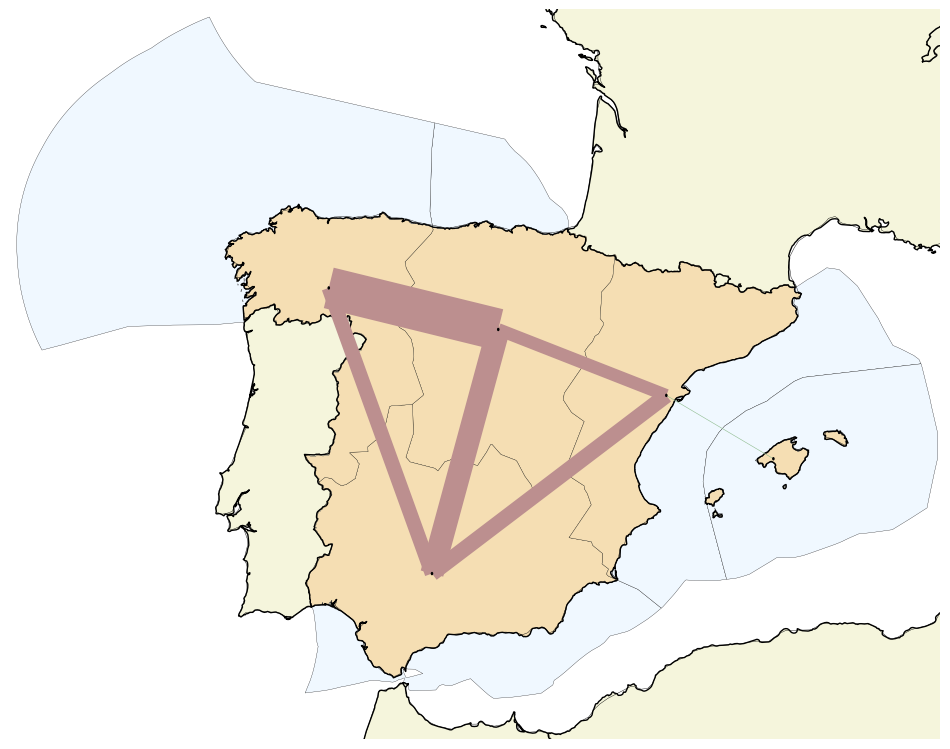

In [5]:
#################### Parameters
line_widths = 1*n.lines.s_nom / 1e3
link_widths = 1*n.links.p_nom / 1e3



#################### Figure
fig_size = [12,12]
crs = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=fig_size, subplot_kw={'projection': crs})


### Add network
n.plot(ax=ax, 
       line_widths=line_widths, 
       link_widths=link_widths, 
       bus_sizes=params['bus_sizes'], 
       bus_colors=params['bus_colors'], 
       boundaries=params['boundaries_offshore'])

### Add regions_onshore
xp.map_add_region(ax, gdf_regions_onshore, params['map_add_region'])

### Add regions_offshore
xp.map_add_region(ax, gdf_regions_offshore, params['map_add_region'], is_offshore=True)

### Add map features
xp.map_add_features(ax, params['map_add_features'])

### Variable: `n.buses`

Place `n.buses` in a dataFrame and show its content.

In [6]:
bb = n.buses

bb.head()

,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network,country,substation_off,substation_lv
Bus,,,,,,,,,,,,,,,
ES0 0,380.0,,-3.316362,41.735450,AC,,1.0,0.0,inf,Slack,,,ES,True,True
ES0 1,380.0,,-4.766527,37.720784,AC,,1.0,0.0,inf,PQ,,,ES,True,True
ES0 2,380.0,,0.361785,40.651417,AC,,1.0,0.0,inf,PQ,,,ES,True,True
ES0 3,380.0,,-7.024813,42.418875,AC,,1.0,0.0,inf,PQ,,,ES,True,True
ES1 0,380.0,,2.704258,39.609088,AC,,1.0,0.0,inf,Slack,,,ES,True,True


### Variable: `n.lines`

Place `n.lines` in a dataFrame and show its content.

In [7]:
ln = n.lines

ln.head()

,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt,dc,v_nom,i_nom
Line,,,,,,,,,,,,,,,,,,,,,
0,ES0 0,ES0 1,Al/St 240/40 4-bundle 380.0,9.429679,1.323701,0.0,0.025165,16757.591563,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380,2.58
1,ES0 0,ES0 2,Al/St 240/40 4-bundle 380.0,11.184400,1.652450,0.0,0.010923,9116.129810,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380,2.58
2,ES0 0,ES0 3,Al/St 240/40 4-bundle 380.0,3.498553,0.497898,0.0,0.031523,29940.230260,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380,2.58
3,ES0 1,ES0 2,Al/St 240/40 4-bundle 380.0,19.809565,2.533720,0.0,0.016436,11216.414620,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380,2.58
4,ES0 1,ES0 3,Al/St 240/40 4-bundle 380.0,18.373397,2.568769,0.0,0.018622,10412.050225,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380,2.58


How is the distribution of line lengths?

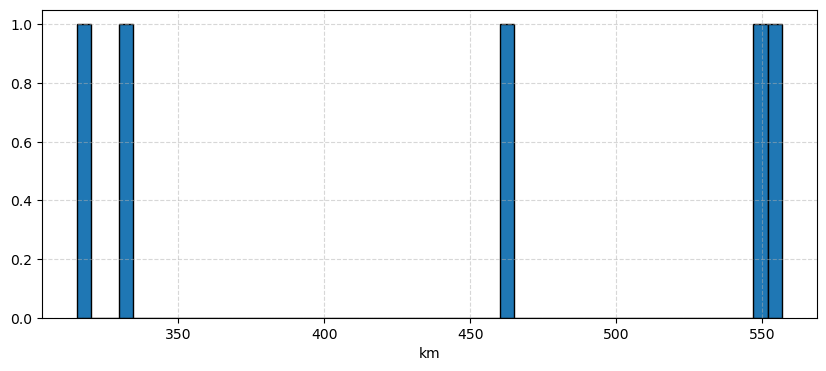

In [8]:
#################### Parameters
bins = 50



#################### Figure
fig_size = [10,4]
fig, ax = plt.subplots(figsize=fig_size)


ax.hist(ln['length'], bins=bins, edgecolor='black')

ax.set_xlabel('km')
ax.grid(True, linestyle='--', alpha=0.5)

### Variable: `n.links`

Place `n.links` in a dataFrame and show its content.

In [9]:
lk = n.links

lk.head()

,bus0,bus1,type,carrier,efficiency,active,build_year,lifetime,p_nom,p_nom_mod,...,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt,dc,underground,voltage,geometry,underwater_fraction,under_construction,tags
Link,,,,,,,,,,,,,,,,,,,,,
relation/17631956-250-DC,ES0 2,ES1 0,,DC,1.0,True,0,inf,400.0,0.0,...,1.0,1.0,0.0,1.0,True,250,LINESTRING (-0.2354476169104305 39.64108480222...,0.98193,False,relation/17631956


## `regions_onshore_base_s_{clusters}.geojson`

Show its content.

In [10]:
gdf_regions_onshore.head()

,name,geometry
0,ES0 0,"POLYGON ((-5.18941 40.449, -5.1978 40.50397, -..."
1,ES0 1,"MULTIPOLYGON (((-6.17266 36.35564, -6.17783 36..."
2,ES0 2,"MULTIPOLYGON (((-1.27729 38.24471, -1.76788 38..."
3,ES0 3,"MULTIPOLYGON (((-8.74589 41.95087, -8.74781 41..."
4,ES1 0,"MULTIPOLYGON (((1.2349 38.93794, 1.2355 38.938..."


How many regions are there in the file?

In [11]:
len(gdf_regions_onshore)

5

<Axes: >

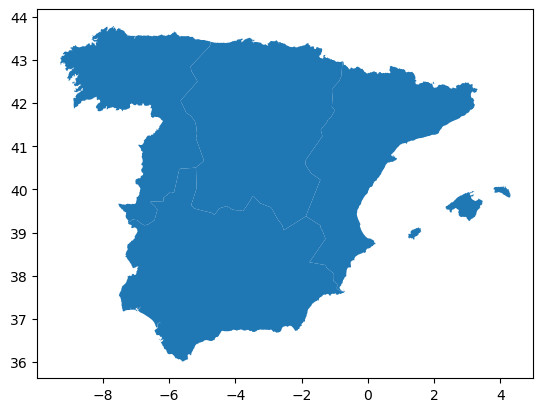

In [12]:
gdf_regions_onshore.plot()

## `regions_offshore_base_s_{clusters}.geojson`

Show its content.

In [13]:
gdf_regions_offshore = gpd.read_file(path_regions+file_regions_offshore)

gdf_regions_offshore.head()

,name,geometry
0,ES0 0,"POLYGON ((-3.46381 43.3819, -3.46413 43.3839, ..."
1,ES0 1,"POLYGON ((-7.54199 35.75649, -7.52736 35.78394..."
2,ES0 2,"POLYGON ((-0.72106 37.66172, -0.72576 37.66723..."
3,ES0 3,"POLYGON ((-8.88789 41.97086, -8.88537 41.94342..."
4,ES1 0,"MULTIPOLYGON (((3.03501 37.98266, 2.92141 37.9..."


How many regions are there in the file?

In [14]:
len(gdf_regions_offshore)

5

<Axes: >

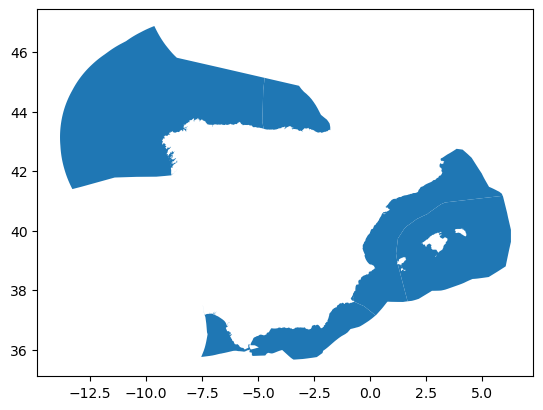

In [15]:
gdf_regions_offshore.plot()